In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the data into dataframe
df = pd.read_csv("day.csv")

In [3]:
df.shape

(730, 16)

Data frame contains 730 entries with 16 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observations:
- There are no null values that need to be imputed.
- All fields are numerical based on the dtype except the field "dteday"

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Pre-processing

In [6]:
# Handling date data type

df.dteday = pd.to_datetime(df.dteday, format = "%d-%m-%Y")

In [7]:
# check unique values to see if any of the numerical columns are actually categorical

df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# checking what the unique values to check if they are categorical
print(df.season.unique()) # each category indicates the season
print(df.yr.unique()) # only 2 years 2018, 2019
print(df.mnth.unique()) # month number
print(df.holiday.unique()) # whether day is a holiday or not
print(df.weekday.unique()) # the day of the week
print(df.workingday.unique())  # if day is not holiday and not weekend, it is working day
print(df.weathersit.unique()) # actually there are 4 weather categories, but we have only 3 unique values.


[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


Observations:
- We can derive the weekend variable if required.
- since we have the column year, the dteday information with year is not useful, maybe we can derive the day and remove the dteday column


In [9]:
# derive day field from dteday and remove the original column and drop existing dteday column
df["day"] = df.dteday.dt.day
df.drop("dteday", axis = 1, inplace=True)

In [10]:
# the column "instant" is basically the index, which we can remove since, data frame already holds the index
df.drop("instant", axis = 1, inplace=True)

In [11]:
num_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit","day"]

We need to create a df for EDA purpose. This df should have all the categorical mapped according to the 
data mapping given in the dictionary. 
This is done for better underestanding during EDA.


In [12]:
df_for_eda = df.copy()

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [14]:
df_for_eda.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [15]:
season_di =  {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
year_di =  {0: "2018", 1:"2019"}
month_di = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}
weekday_di = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurw",5:"Fri",6:"Sat"}
weathersit_di = {1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"}


In [16]:
df_for_eda["season"] = df_for_eda["season"].map(season_di)
df_for_eda["yr"] = df_for_eda["yr"].map(year_di)
df_for_eda["mnth"] = df_for_eda["mnth"].map(month_di)
df_for_eda["weekday"] = df_for_eda["weekday"].map(weekday_di)
df_for_eda["weathersit"] = df_for_eda["weathersit"].map(weathersit_di)

### EDA

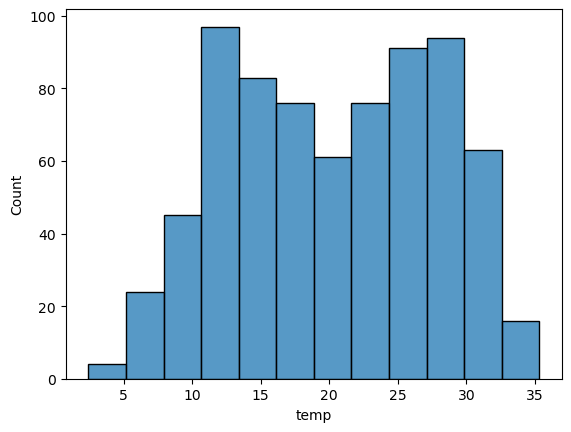

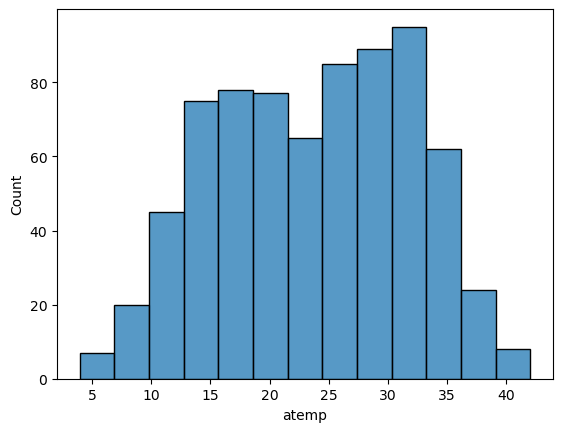

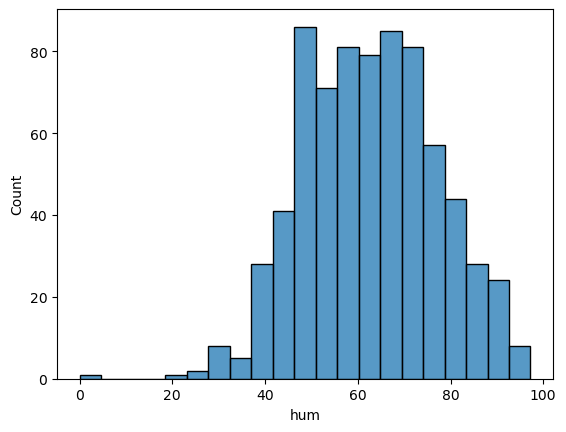

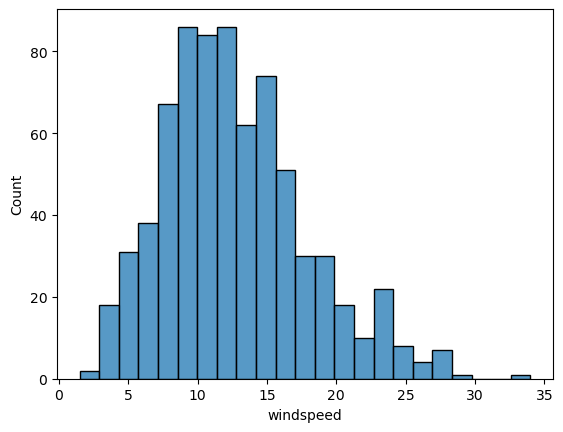

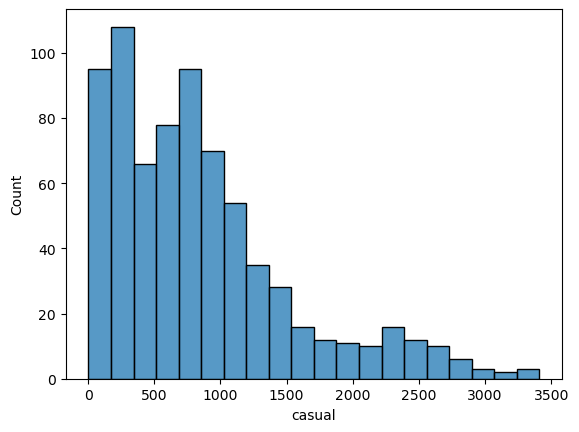

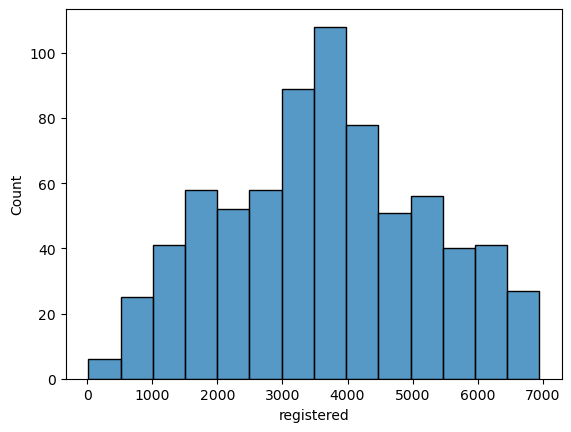

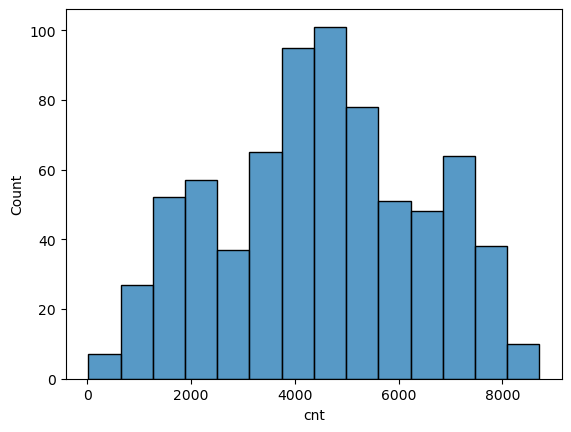

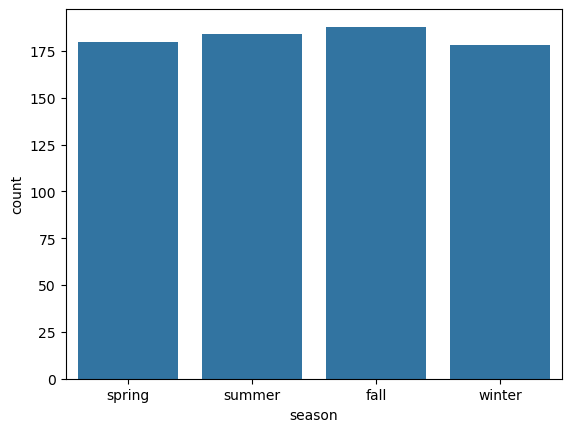

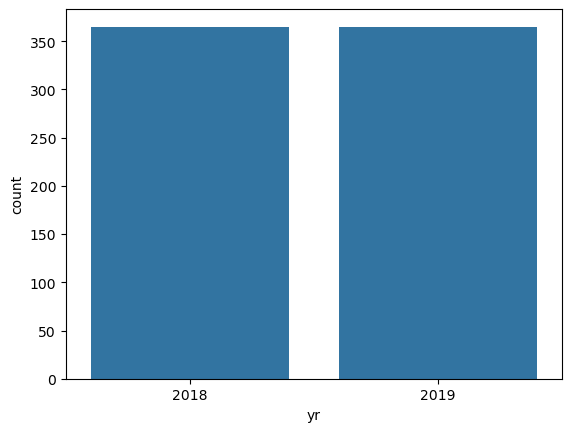

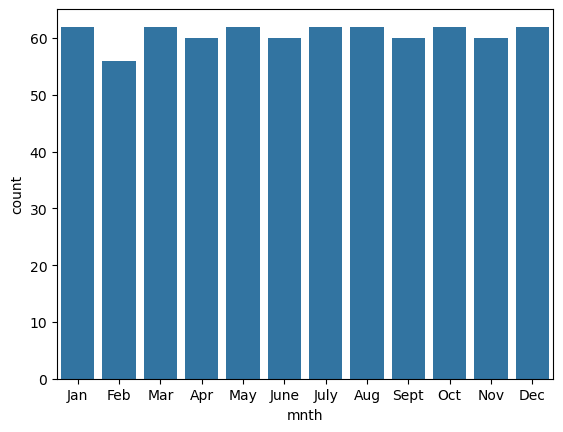

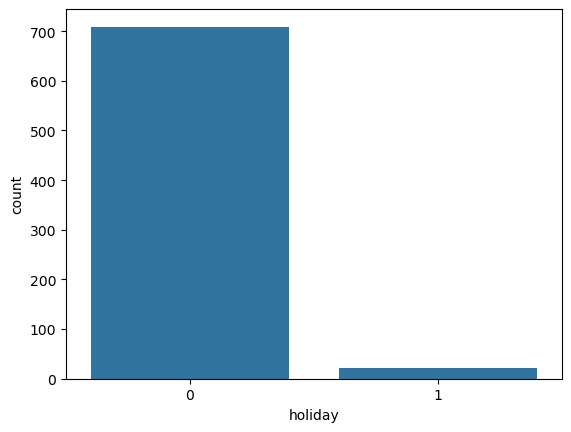

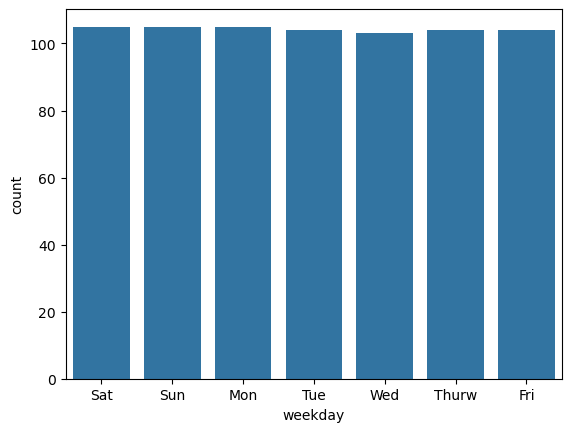

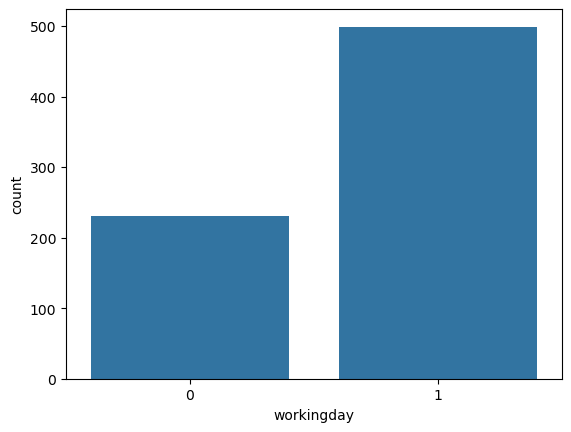

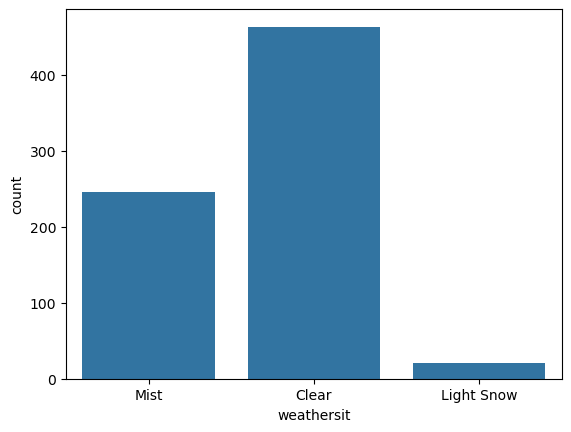

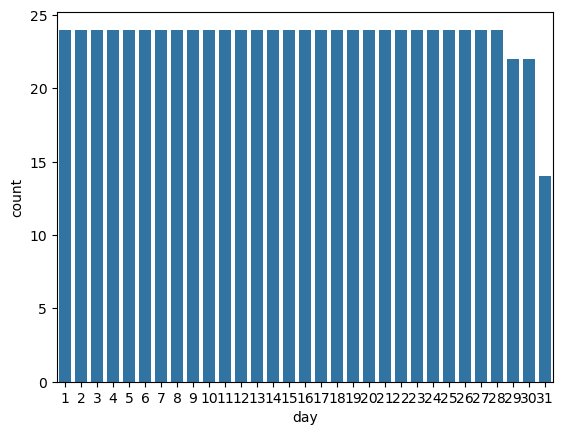

In [17]:
# Univariate Analysis
for i in num_cols:
    sns.histplot(x=df_for_eda[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df_for_eda[i])
    plt.show()

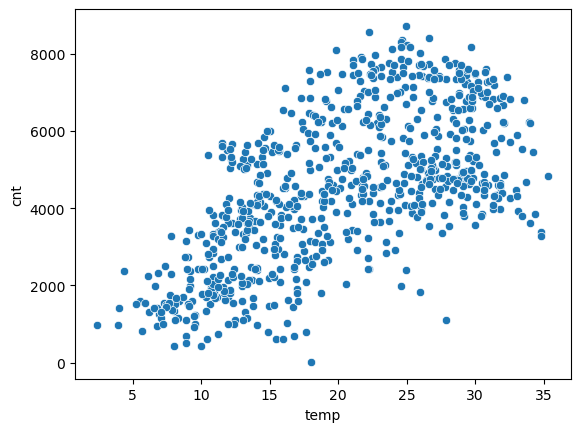

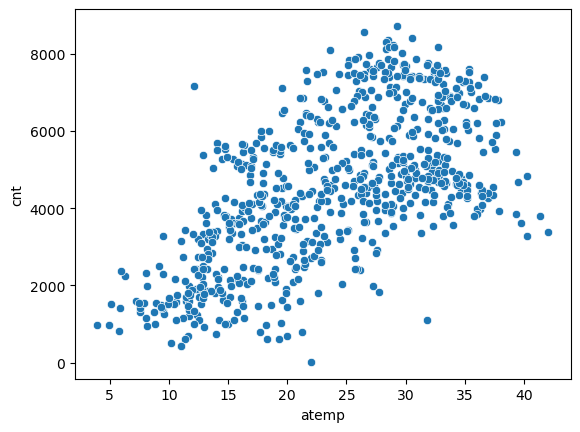

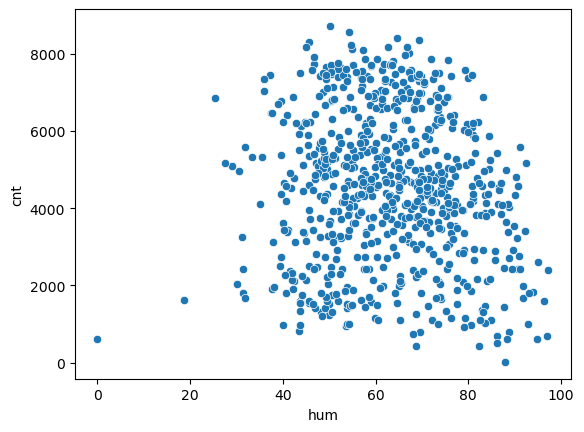

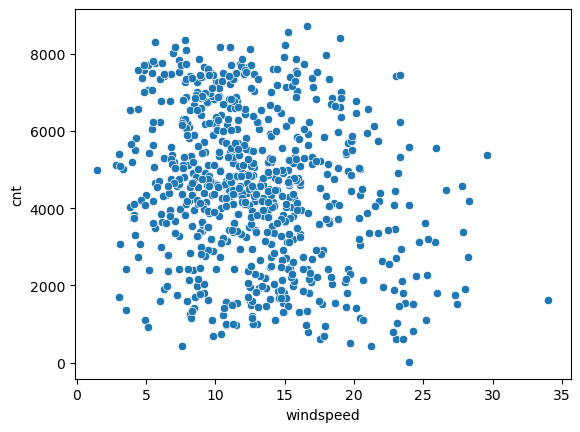

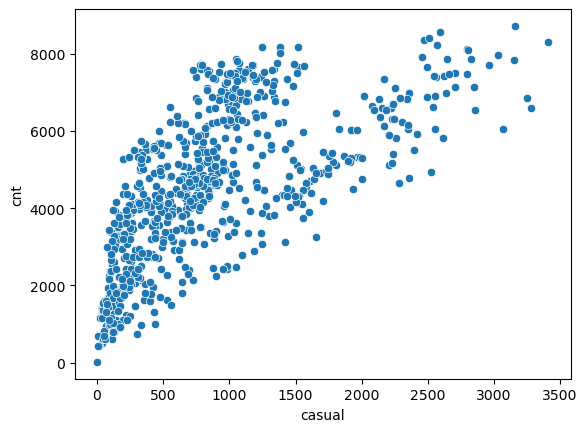

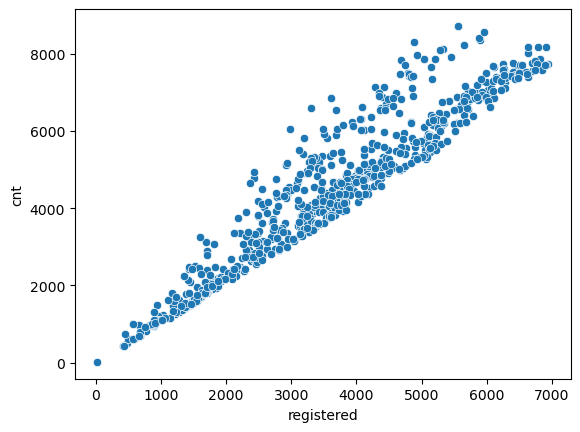

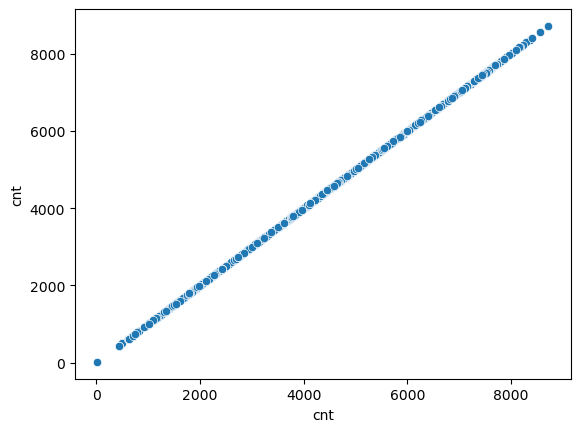

In [18]:
# Bivariate Analysis
#sns.pairplot(df[num_cols])
#plt.show()
for i in num_cols:
    sns.scatterplot(x=df_for_eda[i],y=df_for_eda["cnt"])
    plt.show()

Observations: temp, atemp, casual, registered variables seems to directly affect cnt in a way.

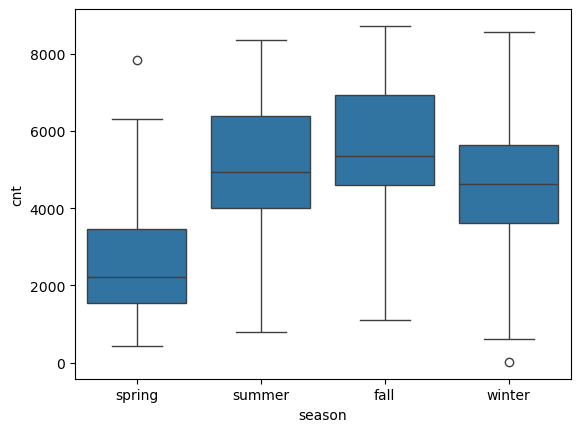

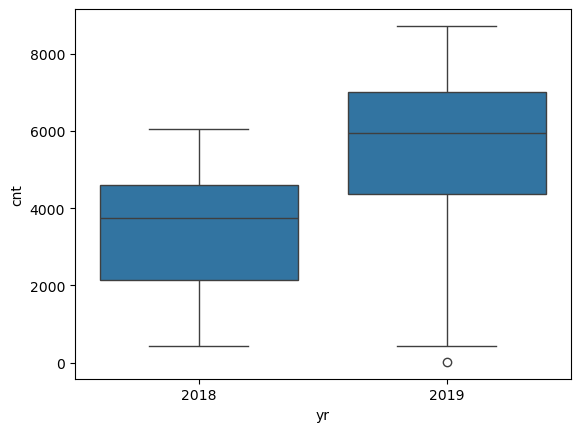

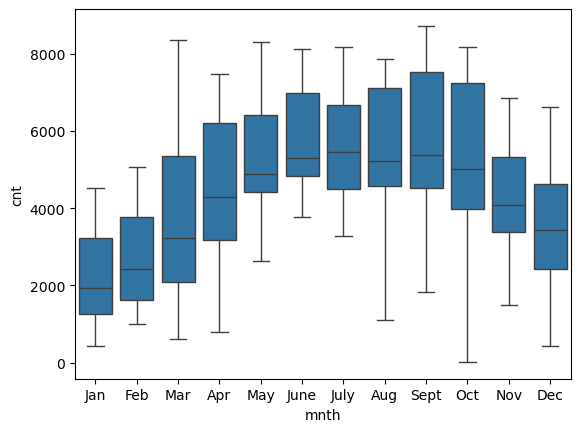

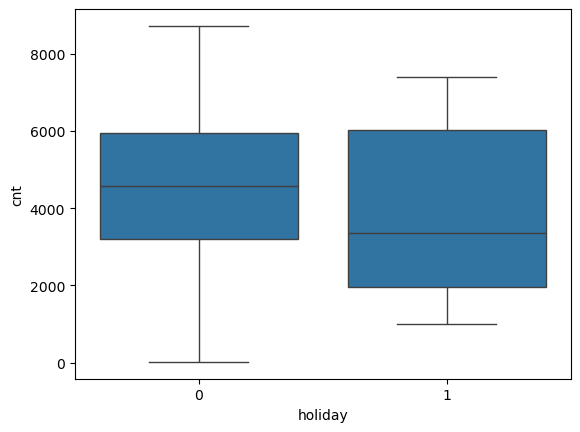

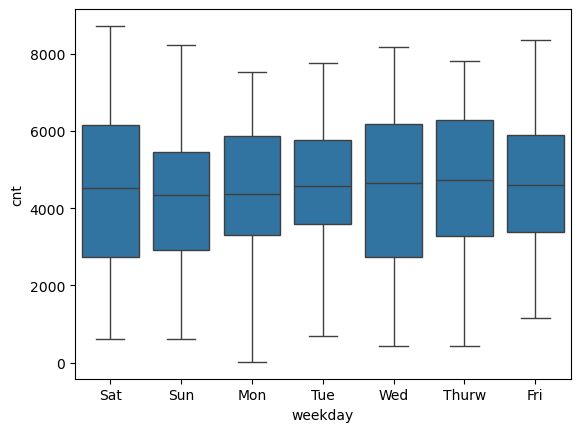

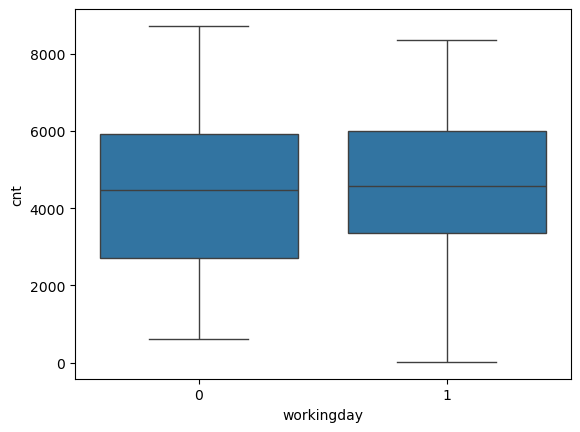

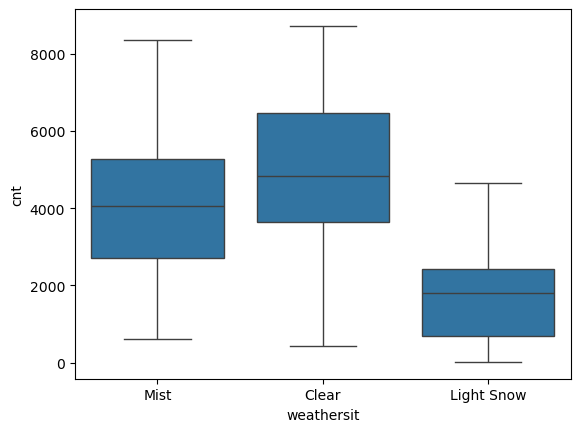

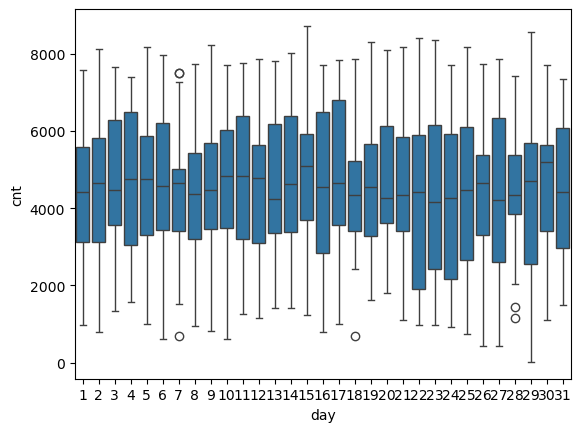

In [19]:
# to analyse categorical vs numerical, best is to use box plot.
for i in cat_cols:
    sns.boxplot(x=df_for_eda[i],y=df_for_eda["cnt"])
    plt.show()

Observations:
- season does affect cnt
- yr does affect cnt
- there is pattern in the mnths affecting cnt
- holiday does indicate direct correlation. This should be further checked
- weekday does not affect cnt
- working day does not affect cnt
- weathersit does affect variance in cnt
- There is no clear pattern for day to indicate that it affects the variance in cnt.

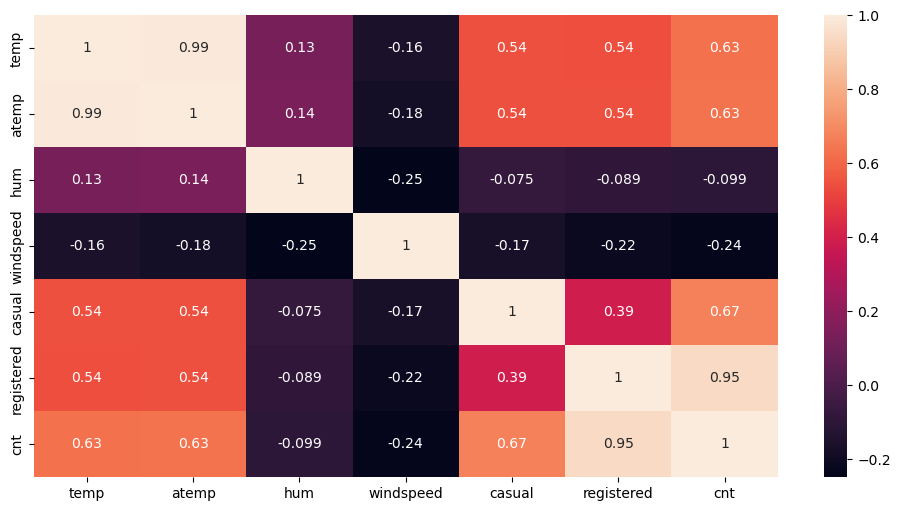

In [20]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df_for_eda[num_cols].corr(),annot=True)
plt.show()

As seen from the scatter plot and the heat map, there are more than one feature variables that are correlated with the target variable, i.e cnt. We will have to use multiple regression to build a model for the same.

Additionaly notice that if any 2 features have very high co-relation, having both makes no sense, and we should 
drop one of them. 

atemp, temp has high co-relation

- remove atemp

registered, cnt has a high co-relation. That is likely because cnt is derived from 'registered' and 'casual' features.

cnt = casual + registered. 
- so drop casual, registered

In [21]:
df.drop(["atemp", "casual", "registered"], axis=1, inplace=True)


In [22]:
num_cols.remove("atemp")
num_cols.remove("casual")
num_cols.remove("registered")

In [23]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

### Pre-processing steps

#### Dummy variable creation (one hot encoding)

In [24]:
# Wherever we have more than 2 categories in categorical features, we need to create dummies for them

In [25]:
df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
day           31
dtype: int64

We have to do one hot encoding for -> season, mnth, weekday, weathersit, day

In [26]:
# Number of dummies = n-1
for col in cat_cols:
    dum=pd.get_dummies(df[col], prefix = col, drop_first=True,dtype=int)
    # concat dummy df with original 
    df = pd.concat([df, dum], axis=1)
    df = df.drop(col, axis=1)
    df.head()

In [27]:
len(df.columns)

59

In [28]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [29]:
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train-test split

In [30]:
target_var = "cnt"

In [31]:
X=df.drop([target_var],axis=1)
y=df[target_var]

In [32]:
from sklearn.model_selection import train_test_split
# creating train test split of 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [33]:
# check size of train and test data
print(X_train.shape)
print(X_test.shape)

(511, 58)
(219, 58)


### Scaling

In [34]:
# Using MinMax scaler for scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [36]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [37]:
X_train_df.head(2)

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.509887,0.575354,0.300794,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.815169,0.725633,0.264686,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature selection

Automatic feature selection. The number of features are too many. So we need to use RFE to get these features down automatically. After getting a list of n selected features, we can manually analyse and remove more features based on p value, and VIF. 

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15) 

In [40]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True])

In [41]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_8',
       'mnth_9', 'holiday_1', 'weathersit_2', 'weathersit_3', 'day_16',
       'day_17', 'day_20', 'day_31'],
      dtype='object')


In [42]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

### Modelling

In [43]:
import statsmodels.api as sm

In [44]:
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [45]:
model1=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.31e-190
Time:                        18:42:13   Log-Likelihood:                -4117.0
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1988.7339    231.206      8.602      0.000    1534.468    2443.000
temp          4709.1689    189.317     24.874      0.000    4337.204    5081.134
hum          -1570.5549    321.702     -4.882      0.000   -2202.624    -938.485
windspeed    -1558.5177    220.435     -7.070      0.000   -1991.621   -1125.415
season_2       900.3372     93.428      9.637      0.000     716.773    1083.902
season_4      1292.9036     91.251     14.169      0.000    1113.618    1472.190
yr_1          1993.1764     69.646     28.619      0.000    1856.339    2130.014
mnth_8         456.1317    140.310      3.251      0.001     180.456     731.807
mnth_9        1055.0389    139.145      7.582      0.000     781.651    1328.427
holiday_1     -914.4357    221.465     -4.129      0.000   -1349.563    -479.308
weathersit_2  -471.7566     90.186     -5.231      0.000    -648.951    -294.563
weathersit_3 -2061.6408    226.306     -9.110      0.000   -2506.280   -1617.001
day_16         415.1702    193.284      2.148      0.032      35.412     794.929
day_17         469.3219    192.421      2.439      0.015      91.259     847.385
day_20         381.4952    192.690      1.980      0.048       2.904     760.086
day_31         661.0814    263.106      2.513      0.012     144.138    1178.024
==============================================================================
Omnibus:                       53.335   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.311
Skew:                          -0.609   Prob(JB):                     4.99e-24
Kurtosis:                       4.886   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pval_desc = res1.pvalues.sort_values(ascending=False)
pval_desc.round(3) 

day_20          0.048
day_16          0.032
day_17          0.015
day_31          0.012
mnth_8          0.001
holiday_1       0.000
hum             0.000
weathersit_2    0.000
windspeed       0.000
mnth_9          0.000
const           0.000
weathersit_3    0.000
season_2        0.000
season_4        0.000
temp            0.000
yr_1            0.000
dtype: float64

Acceptable Range for p-values is <0.05
Acceptable Range for VIF is <5
We could have the following situations - 
- High p value, high VIF => no brainer, just remove that variable
- High-low
    - High P value, Low VIF => remove these FIRST
    - Low p value, High VIF => remove after the above
- Low p, low VIF => we just retain

So we must look at both P values and VIFs to be able to drop features one by one.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.393022
2,hum,1.862997
10,weathersit_2,1.559490
1,temp,1.546509
7,mnth_8,1.449314
4,season_2,1.377007
5,season_4,1.320552
11,weathersit_3,1.239129
8,mnth_9,1.213300
3,windspeed,1.185095


All the VIFs are less than 5 (we are not considering vif of const term because we are not going to make any inference on the const term).

P values are all less than 0.05. So all variables are significant. But if we observe there are a few p values that are way more than other features. So let's drop the feature with highest p value and try to get all p values in the same range.

In [48]:
# drop day_20 has 0.048 p value
X_train_sm=X_train_sm.drop("day_20",axis=1)
X_test_sm=X_test_sm.drop("day_20",axis=1)

model2=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.45e-191
Time:                        18:44:50   Log-Likelihood:                -4119.1
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1998.2867    231.835      8.619      0.000    1542.787    2453.786
temp          4702.6422    189.845     24.771      0.000    4329.643    5075.642
hum          -1555.5882    322.558     -4.823      0.000   -2189.337    -921.839
windspeed    -1576.8284    220.888     -7.139      0.000   -2010.820   -1142.837
season_2       897.9216     93.695      9.583      0.000     713.834    1082.009
season_4      1293.4545     91.518     14.133      0.000    1113.643    1473.266
yr_1          1997.5134     69.816     28.611      0.000    1860.342    2134.684
mnth_8         459.4850    140.712      3.265      0.001     183.021     735.949
mnth_9        1059.3540    139.537      7.592      0.000     785.197    1333.511
holiday_1     -895.0478    221.899     -4.034      0.000   -1331.025    -459.070
weathersit_2  -467.4545     90.424     -5.170      0.000    -645.117    -289.792
weathersit_3 -2073.4149    226.893     -9.138      0.000   -2519.205   -1627.625
day_16         399.9462    193.699      2.065      0.039      19.375     780.517
day_17         454.1816    192.834      2.355      0.019      75.309     833.054
day_31         647.0511    263.784      2.453      0.015     128.779    1165.323
==============================================================================
Omnibus:                       54.469   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.056
Skew:                          -0.622   Prob(JB):                     2.08e-24
Kurtosis:                       4.891   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pval_desc = res2.pvalues.sort_values(ascending=False)
pval_desc.round(3) 

day_16          0.039
day_17          0.019
day_31          0.015
mnth_8          0.001
holiday_1       0.000
hum             0.000
weathersit_2    0.000
windspeed       0.000
mnth_9          0.000
const           0.000
weathersit_3    0.000
season_2        0.000
season_4        0.000
temp            0.000
yr_1            0.000
dtype: float64

after removing day_20, p value for day_17 increased slightly. 

In [50]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.373253
2,hum,1.861969
10,weathersit_2,1.558585
1,temp,1.546040
7,mnth_8,1.449103
4,season_2,1.376772
5,season_4,1.320539
11,weathersit_3,1.238274
8,mnth_9,1.213002
3,windspeed,1.183009


The VIFs are still under control, let's go ahead to drop the next highest p value feature

In [51]:
# drop day_16 with p value 0.039
X_train_sm=X_train_sm.drop("day_16",axis=1)
X_test_sm=X_test_sm.drop("day_16",axis=1)

model3=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.63e-191
Time:                        18:47:16   Log-Likelihood:                -4121.3
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2015.2235    232.449      8.670      0.000    1558.520    2471.927
temp          4716.9769    190.340     24.782      0.000    4343.007    5090.947
hum          -1565.0118    323.583     -4.837      0.000   -2200.771    -929.252
windspeed    -1588.2897    221.542     -7.169      0.000   -2023.564   -1153.015
season_2       896.3802     93.999      9.536      0.000     711.696    1081.064
season_4      1290.8651     91.810     14.060      0.000    1110.482    1471.248
yr_1          1995.2955     70.036     28.489      0.000    1857.692    2132.899
mnth_8         450.6884    141.108      3.194      0.001     173.446     727.930
mnth_9        1060.4020    139.993      7.575      0.000     785.350    1335.454
holiday_1     -844.0958    221.245     -3.815      0.000   -1278.787    -409.405
weathersit_2  -466.6560     90.720     -5.144      0.000    -644.898    -288.414
weathersit_3 -2054.9820    227.461     -9.034      0.000   -2501.885   -1608.079
day_17         438.9369    193.324      2.270      0.024      59.103     818.771
day_31         634.4130    264.577      2.398      0.017     114.585    1154.241
==============================================================================
Omnibus:                       56.213   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.124
Skew:                          -0.638   Prob(JB):                     2.73e-25
Kurtosis:                       4.920   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pval_desc = res3.pvalues.sort_values(ascending=False)
pval_desc.round(3) 

day_17          0.024
day_31          0.017
mnth_8          0.001
holiday_1       0.000
hum             0.000
weathersit_2    0.000
windspeed       0.000
mnth_9          0.000
const           0.000
weathersit_3    0.000
season_2        0.000
season_4        0.000
temp            0.000
yr_1            0.000
dtype: float64

p value of day_17 further increased after dropping day_16

In [53]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.316451
2,hum,1.861596
10,weathersit_2,1.558557
1,temp,1.543972
7,mnth_8,1.447775
4,season_2,1.376684
5,season_4,1.320291
11,weathersit_3,1.236357
8,mnth_9,1.212986
3,windspeed,1.182262


VIFs are still under control, let's go ahead to drop the next highest p value feature.

In [54]:
# drop day_17 with p value 0.024
X_train_sm=X_train_sm.drop("day_17",axis=1)
X_test_sm=X_test_sm.drop("day_17",axis=1)

model4=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.06e-191
Time:                        18:48:17   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2031.1990    233.310      8.706      0.000    1572.806    2489.592
temp          4720.2355    191.127     24.697      0.000    4344.721    5095.750
hum          -1581.8495    324.845     -4.870      0.000   -2220.085    -943.614
windspeed    -1582.1441    222.448     -7.112      0.000   -2019.196   -1145.093
season_2       902.5615     94.351      9.566      0.000     717.187    1087.936
season_4      1294.1617     92.180     14.039      0.000    1113.052    1475.272
yr_1          1992.2156     70.315     28.333      0.000    1854.066    2130.365
mnth_8         458.3707    141.655      3.236      0.001     180.056     736.686
mnth_9        1070.2958    140.508      7.617      0.000     794.234    1346.358
holiday_1     -823.4999    221.979     -3.710      0.000   -1259.632    -387.368
weathersit_2  -456.5844     90.989     -5.018      0.000    -635.354    -277.815
weathersit_3 -2062.6876    228.382     -9.032      0.000   -2511.399   -1613.976
day_31         621.9649    265.622      2.342      0.020     100.088    1143.842
==============================================================================
Omnibus:                       57.121   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.647
Skew:                          -0.617   Prob(JB):                     5.20e-28
Kurtosis:                       5.092   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pval_desc = res4.pvalues.sort_values(ascending=False)
pval_desc.round(3) 


day_31          0.020
mnth_8          0.001
holiday_1       0.000
hum             0.000
weathersit_2    0.000
windspeed       0.000
mnth_9          0.000
const           0.000
weathersit_3    0.000
season_2        0.000
season_4        0.000
temp            0.000
yr_1            0.000
dtype: float64

p value of day_31 increased. This is the only feature which has a very high p value compared to others. Let's drop it.

In [57]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.274929
2,hum,1.860618
10,weathersit_2,1.554830
1,temp,1.543885
7,mnth_8,1.446942
4,season_2,1.375530
5,season_4,1.319961
11,weathersit_3,1.236082
8,mnth_9,1.211811
3,windspeed,1.182085


All the VIFs are < 5 and are still under control. Let's go ahead and drop day_31

In [58]:
# drop day_31 with p value 0.020
X_train_sm=X_train_sm.drop("day_31",axis=1)
X_test_sm=X_test_sm.drop("day_31",axis=1)

model5=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.92e-191
Time:                        18:49:39   Log-Likelihood:                -4126.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     499   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2042.0192    234.309      8.715      0.000    1581.665    2502.374
temp          4694.5708    191.667     24.493      0.000    4317.996    5071.145
hum          -1550.8555    326.030     -4.757      0.000   -2191.416    -910.295
windspeed    -1597.6809    223.345     -7.153      0.000   -2036.494   -1158.868
season_2       904.3650     94.770      9.543      0.000     718.167    1090.563
season_4      1289.3596     92.570     13.928      0.000    1107.484    1471.236
yr_1          1991.0670     70.628     28.191      0.000    1852.302    2129.832
mnth_8         479.4007    142.003      3.376      0.001     200.402     758.399
mnth_9        1061.6642    141.089      7.525      0.000     784.462    1338.866
holiday_1     -832.2047    222.943     -3.733      0.000   -1270.227    -394.182
weathersit_2  -461.8210     91.369     -5.054      0.000    -641.336    -282.306
weathersit_3 -2035.8174    229.116     -8.886      0.000   -2485.968   -1585.667
==============================================================================
Omnibus:                       56.444   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.869
Skew:                          -0.611   Prob(JB):                     1.27e-27
Kurtosis:                       5.079   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
pval_desc = res5.pvalues.sort_values(ascending=False)
pval_desc.round(3) 


mnth_8          0.001
holiday_1       0.000
hum             0.000
weathersit_2    0.000
windspeed       0.000
mnth_9          0.000
const           0.000
weathersit_3    0.000
season_2        0.000
season_4        0.000
temp            0.000
yr_1            0.000
dtype: float64

In [60]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.257169
2,hum,1.857529
10,weathersit_2,1.553891
1,temp,1.538807
7,mnth_8,1.441126
4,season_2,1.375438
5,season_4,1.319308
11,weathersit_3,1.232961
8,mnth_9,1.210977
3,windspeed,1.181034


mnth_8 is the only feature which has a high p value compared to other features. In order to keep our model simply and more accurate, let's drop mnth_8

In [61]:
# drop mnth_8 with p value 0.001
X_train_sm=X_train_sm.drop("mnth_8",axis=1)
X_test_sm=X_test_sm.drop("mnth_8",axis=1)

model6=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.87e-190
Time:                        18:50:37   Log-Likelihood:                -4132.5
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     500   BIC:                             8334.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1989.7662    236.216      8.424      0.000    1525.668    2453.865
temp          4963.9013    176.078     28.192      0.000    4617.958    5309.845
hum          -1533.6561    329.362     -4.656      0.000   -2180.760    -886.552
windspeed    -1625.7151    225.499     -7.209      0.000   -2068.758   -1182.672
season_2       787.7991     89.169      8.835      0.000     612.606     962.992
season_4      1219.6526     91.172     13.378      0.000    1040.526    1398.780
yr_1          1994.0144     71.353     27.946      0.000    1853.826    2134.203
mnth_9         927.4632    136.774      6.781      0.000     658.741    1196.185
holiday_1     -850.9419    225.179     -3.779      0.000   -1293.356    -408.528
weathersit_2  -440.0239     92.083     -4.779      0.000    -620.942    -259.106
weathersit_3 -2049.3842    231.450     -8.855      0.000   -2504.119   -1594.649
==============================================================================
Omnibus:                       60.383   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.701
Skew:                          -0.671   Prob(JB):                     8.35e-28
Kurtosis:                       5.014   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
pval_desc = res6.pvalues.sort_values(ascending=False)
pval_desc.round(3) 


holiday_1       0.0
hum             0.0
weathersit_2    0.0
mnth_9          0.0
windspeed       0.0
const           0.0
season_2        0.0
weathersit_3    0.0
season_4        0.0
yr_1            0.0
temp            0.0
dtype: float64

In [63]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,45.059686
2,hum,1.857075
9,weathersit_2,1.546132
1,temp,1.272208
5,season_4,1.253670
10,weathersit_3,1.232582
4,season_2,1.192863
3,windspeed,1.179401
7,mnth_9,1.114846
6,yr_1,1.027545


The p values are all 0. So all the features are now significant. Also, the VIFs are under control.( We are ignoring constant because we are not infering anything from it). We don't have to drop any more variables.

## Residual analysis

/var/folders/k9/z4r97g651pg7rl6n04pp1zfh0000gn/T/ipykernel_43462/2547242850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

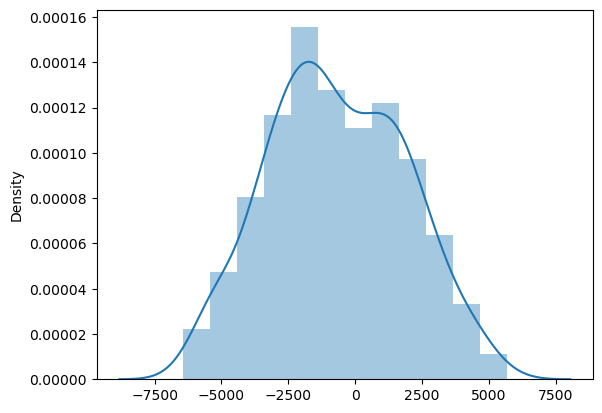

In [64]:
y_train_pred = res6.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)



mean is around 0 and a normal distribution. so looks good. Are assumptions for linear regression holds good.


### Pediction on test set


before train-test split.. do eda outlier treatment

Try to reduce more number of features to check if we get less complex model with better accuracy

In [65]:
y_train_pred=res6.predict(X_train_sm)
y_test_pred=res6.predict(X_test_sm)

In [66]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2 Train:",round(r2_train,3),"\nr2 Test:",round(r2_test,3))

# We find the Adjusted R-squared using the formula
adjusted_r2_train = 1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adjusted_r2_test = 1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print("adjusted r2 train:", round(adjusted_r2_train,3),"\nadjusted r2 test:", round(adjusted_r2_test,3))

r2 Train: 0.837 
r2 Test: 0.805
adjusted r2 train: 0.832 
adjusted r2 test: 0.79


In [67]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2 Train:",round(r2_train,3),"\nr2 Test:",round(r2_test,3))

# We find the Adjusted R-squared using the formula
adjusted_r2_train = 1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adjusted_r2_test = 1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print("adjusted r2 train:", round(adjusted_r2_train,3),"\nadjusted r2 test:", round(adjusted_r2_test,3))

r2 Train: 0.837 
r2 Test: 0.805
adjusted r2 train: 0.832 
adjusted r2 test: 0.79


In [ ]:
0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  

In [68]:
res5.params

const           2042.019176
temp            4694.570816
hum            -1550.855547
windspeed      -1597.680860
season_2         904.365026
season_4        1289.359621
yr_1            1991.067047
mnth_8           479.400706
mnth_9          1061.664212
holiday_1       -832.204737
weathersit_2    -461.820991
weathersit_3   -2035.817444
dtype: float64

### Model interpretation
The model predicts the cnt pretty well.

The equation of best fitted surface based on model res8 :

cnt = 2042.02*const + 4694.57*temp - 1550.85*hum - 1597.68*windspeed + 904.37*season_2 + 1289.36*season_4 +1991.07*yr_1 + 479.4*mnth_9 + 1061.66*mnth_8 - 832.20*holiday_1 - 461.82*weathersit_2 - 2035.82*weathersit_3

From the model that we derived, it becomes apparent that top features that affects the count of bike rentals depends the most on temperature.

It is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 257.5
Prob (F-statistic): 4.87e-190
The F-Statistics value of 257.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant



Final Result Comparison
- r2 Train: 0.841 
- r2 Test: 0.805
- adjusted r2 train: 0.836 
- adjusted r2 test: 0.79

The model with r2 test > 0.8 is a good model fit.

For achieving maximum bookings, the features with higher coefficients needs to be given more importance
- if temp increases, cnt increases
- if it is season_4 (winter), cnt increases
- if hum, windspeed decreases, cnt increases (since coefficient is negative)
- if weather is mist or light snow, the cnt decreases (since coefficient is negative)